# Инициализация

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('data/stud_math.csv')

# Первичный анализ

In [2]:
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Всего 395 строк и 30 столбцов.

В некоторых столбцах не хватает данных.

## Легенда

1. school — аббревиатура школы, в которой учится ученик
2. sex — пол ученика ('F' - женский, 'M' - мужской)
3. age — возраст ученика (от 15 до 22)
4. address — тип адреса ученика ('U' - городской, 'R' - за городом)
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. Mjob — работа матери:
    - 'teacher' - учитель, 
    - 'health' - сфера здравоохранения, 
    - 'services' - гос служба, 
    - 'at_home' - не работает, 
    - 'other' - другое
10. Fjob — работа отца:
    - 'teacher' - учитель
    - 'health' - сфера здравоохранения
    - 'services' - гос служба
    - 'at_home' - не работает
    - 'other' - другое
11. reason — причина выбора школы:
    - 'home' - близость к дому
    - 'reputation' - репутация школы
    - 'course' - образовательная программа
    - 'other' - другое
12. guardian — опекун:
    - 'mother' - мать 
    - 'father' - отец 
    - 'other' - другое
13. traveltime — время в пути до школы, мин:
    - 1 <15
    - 2 - 15-30 
    - 3 - 30-60
    - 4 - \>60
14. studytime — время на учёбу помимо школы в неделю, часов:
    - 1 - <2 
    - 2 - 2-5 
    - 3 - 5-10 
    - 4 - \>10
15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
16. schoolsup — дополнительная образовательная поддержка (yes или no)
17. famsup — семейная образовательная поддержка (yes или no)
18. paid — дополнительные платные занятия по математике (yes или no)
19. activities — дополнительные внеучебные занятия (yes или no)
20. nursery — посещал детский сад (yes или no)
21. higher — хочет получить высшее образование (yes или no)
22. internet — наличие интернета дома (yes или no)
23. romantic — в романтических отношениях (yes или no)
24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. absences — количество пропущенных занятий
29. score — баллы по госэкзамену по математике

Для удобства приведем имена столбцов к нижнему регистру и уберем запятые

In [3]:
stud.columns = list(map(lambda s: (s.replace(', ', '_').lower() if ', ' in s else s.lower()),list(stud.columns)))
display(list(stud.columns))

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'pstatus',
 'medu',
 'fedu',
 'mjob',
 'fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'studytime_granular',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'health',
 'absences',
 'score']

## score

Основной оцениваемый параметр

In [4]:
stud.score.unique()

array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,   0.,  nan,  20.])

Отсекаем пустые и нулевые значения, так как они не несут для нас полезной инфонмации.

In [5]:
# stud.score = stud.score.apply(lambda x: x if x >=0 else None)
stud = stud[(stud.score > 0)]
display(stud.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              352 non-null    object 
 1   sex                 352 non-null    object 
 2   age                 352 non-null    int64  
 3   address             338 non-null    object 
 4   famsize             328 non-null    object 
 5   pstatus             311 non-null    object 
 6   medu                350 non-null    float64
 7   fedu                331 non-null    float64
 8   mjob                335 non-null    object 
 9   fjob                320 non-null    object 
 10  reason              337 non-null    object 
 11  guardian            323 non-null    object 
 12  traveltime          329 non-null    float64
 13  studytime           345 non-null    float64
 14  failures            332 non-null    float64
 15  schoolsup           343 non-null    object 
 16  famsup  

None

In [6]:
stud.head(10)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


25-й перцентиль: 45.0, 75-й перцентиль: 70.0, IQR: 25.0,  Границы выбросов: [7.5, 107.5].


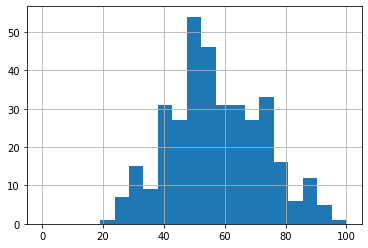

In [7]:
median = stud.score.median()
IQR = stud.score.quantile(0.75) - stud.score.quantile(0.25)
perc25 = stud.score.quantile(0.25)
perc75 = stud.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud.score.loc[stud.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 21, range = (0, 100))

## Кореляция значений в датасете

Проверим корреляцию значений

In [8]:
stud.corr()

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.122979,-0.121617,0.095370,-0.011426,0.235875,0.011426,0.074152,0.004837,0.123638,-0.056173,0.112599,-0.131542
medu,-0.122979,1.000000,0.247339,-0.165394,0.070533,-0.205944,-0.070533,-0.000958,0.021002,0.080556,-0.038050,-0.027377,0.186477
fedu,-0.121617,0.247339,1.000000,0.042074,0.049060,-0.141995,-0.049060,0.049613,-0.071328,-0.026507,0.025874,0.000245,0.069842
traveltime,0.095370,-0.165394,0.042074,1.000000,-0.101490,0.091757,0.101490,-0.023920,-0.023067,0.029374,-0.000092,-0.047560,-0.075516
studytime,-0.011426,0.070533,0.049060,-0.101490,1.000000,-0.156406,-1.000000,0.063856,-0.128661,-0.029686,-0.085469,-0.030187,0.142055
failures,0.235875,-0.205944,-0.141995,0.091757,-0.156406,1.000000,0.156406,-0.011414,0.127391,0.126770,0.064083,0.089541,-0.289377
studytime_granular,0.011426,-0.070533,-0.049060,0.101490,-1.000000,0.156406,1.000000,-0.063856,0.128661,0.029686,0.085469,0.030187,-0.142055
famrel,0.074152,-0.000958,0.049613,-0.023920,0.063856,-0.011414,-0.063856,1.000000,0.162283,0.050751,0.096471,-0.089609,0.046717
freetime,0.004837,0.021002,-0.071328,-0.023067,-0.128661,0.127391,0.128661,0.162283,1.000000,0.296392,0.072729,0.007748,-0.012457
goout,0.123638,0.080556,-0.026507,0.029374,-0.029686,0.126770,0.029686,0.050751,0.296392,1.000000,-0.010343,-0.050616,-0.182286


studytime и studytime_granular корелируют, отбросим studytime_granular как дублирующую информацию

In [9]:
stud.drop(['studytime_granular'], inplace = True, axis = 1)


# Строковые столбцы

Функция для удаления nan в строковых столбцах

In [10]:
def change_nan_str(column):
    stud[column] = stud[column].astype(str).apply(lambda x: None if (x == 'nan') or x.strip() == 'None' else x)

In [11]:
str_columns = ['address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian']

Для удобства переведем nan в None

In [12]:
for s in str_columns:
    change_nan_str(s)

Проверим соответствие легенде

In [13]:
for s in str_columns:
    display(stud[s].unique())

array(['U', None, 'R'], dtype=object)

array([None, 'GT3', 'LE3'], dtype=object)

array(['A', None, 'T'], dtype=object)

array(['at_home', 'health', 'other', 'services', 'teacher', None],
      dtype=object)

array(['teacher', 'other', None, 'health', 'services', 'at_home'],
      dtype=object)

array(['course', 'other', 'home', 'reputation', None], dtype=object)

array(['mother', 'father', 'other', None], dtype=object)

Легенда соответствует

# Числовые столбцы

In [14]:
int_columns = ['medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'health', 'absences']

In [15]:
for i in int_columns:
    print(i, stud[i].unique())

medu [ 4.  1.  3.  2. nan  0.]
fedu [ 4.  1.  2.  3. 40. nan  0.]
traveltime [ 2.  1.  3. nan  4.]
studytime [ 2.  3.  1. nan  4.]
failures [ 0.  3. nan  2.  1.]
famrel [ 4.  5.  3. nan -1.  2.  1.]
freetime [ 3.  2.  4.  1.  5. nan]
goout [ 4.  3.  2.  1.  5. nan]
health [ 3.  5.  1.  2.  4. nan]
absences [  6.   4.  10.   2.   0.  16.  nan  14.   7.   8.  25.  12.  54.  18.
  26.  20.  56.  24.  28.   5.  13.  15.  22.   3. 385.  21.   1.  75.
  30.  19.   9.  11.  38.  40.  23.  17. 212.]


Присутствуют некорректные данные, исключим их.

In [16]:
stud = stud.loc[stud['fedu'] != 40.]
stud = stud.loc[stud['famrel'] != -1.]
stud = stud.loc[stud['absences'] != 385.]

In [17]:
for i in int_columns:
    print(i, stud[i].unique())

medu [ 4.  1.  3.  2. nan  0.]
fedu [ 4.  1.  2.  3. nan  0.]
traveltime [ 2.  1.  3. nan  4.]
studytime [ 2.  3.  1. nan  4.]
failures [ 0.  3. nan  1.  2.]
famrel [ 4.  5.  3. nan  2.  1.]
freetime [ 3.  2.  4.  1.  5. nan]
goout [ 4.  3.  2.  1.  5. nan]
health [ 3.  5.  1.  2.  4. nan]
absences [  6.   4.  10.   2.   0.  16.  nan   7.   8.  25.  14.  12.  54.  18.
  26.  20.  56.  24.  28.   5.  13.  15.  22.   3.  21.   1.  75.  30.
  19.   9.  11.  38.  40.  23.  17. 212.]


# Булевые столбцы

In [26]:
bool_columns = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic']

In [28]:
for i in bool_columns:
    change_nan_str(i)
    display(stud[i].unique())

array(['yes', 'no', None], dtype=object)

array(['no', 'yes', None], dtype=object)

array(['no', None, 'yes'], dtype=object)

array(['no', 'yes', None], dtype=object)

array(['yes', 'no', None], dtype=object)

array(['yes', None, 'no'], dtype=object)

array([None, 'yes', 'no'], dtype=object)

array(['no', None, 'yes'], dtype=object)

# Анализ номинативных переменных

In [18]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index)],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

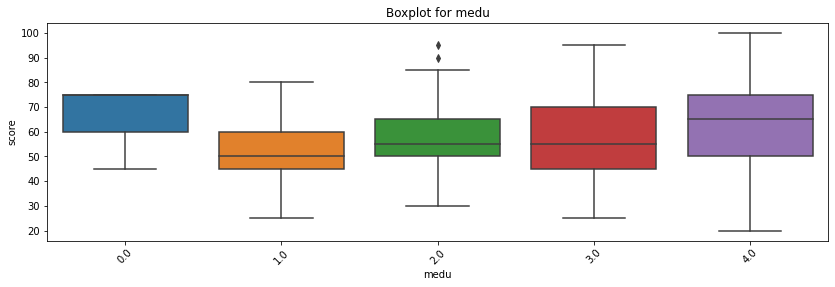

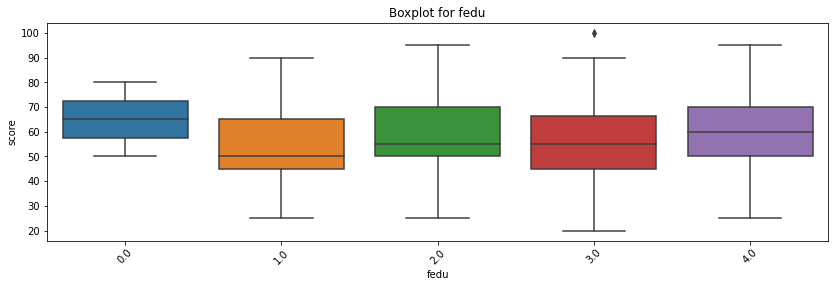

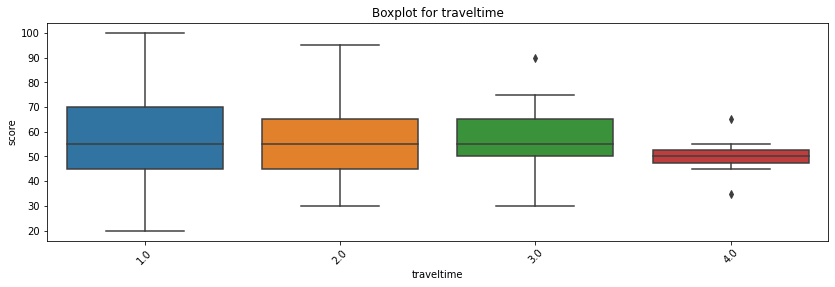

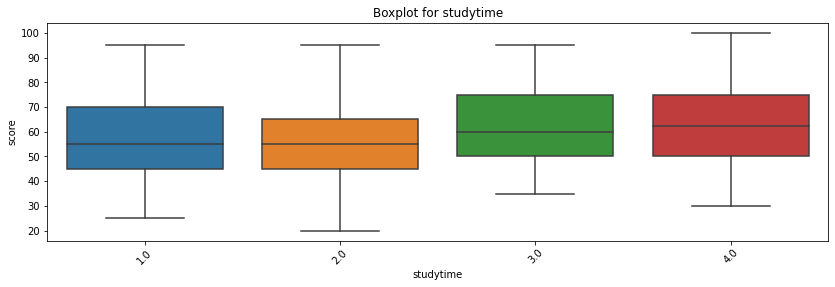

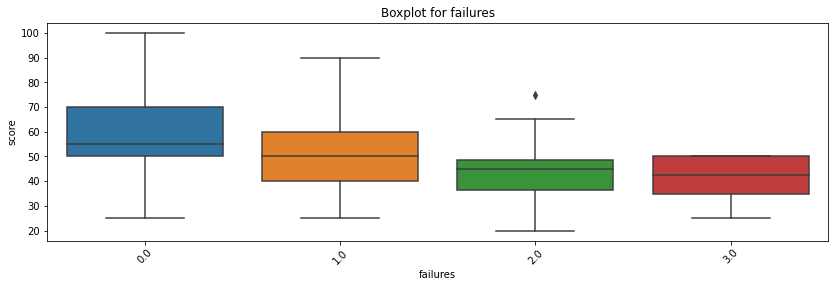

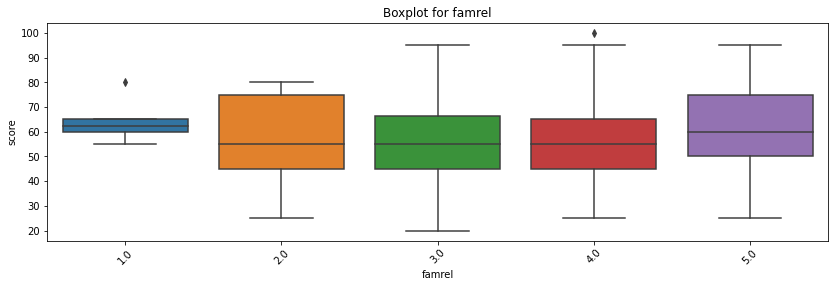

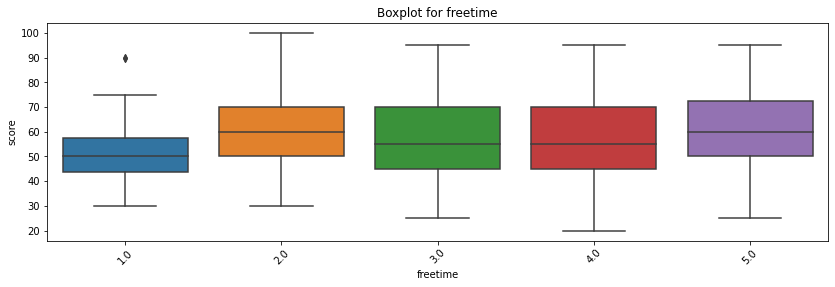

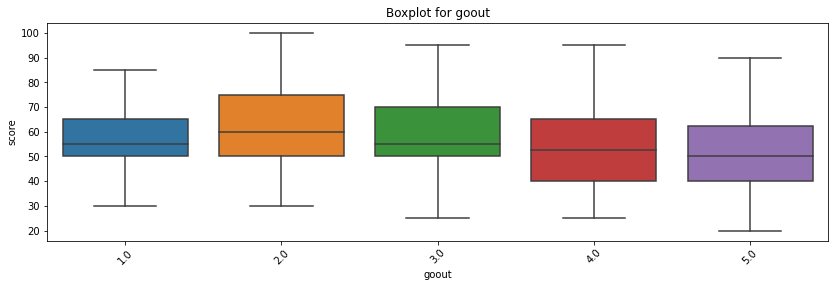

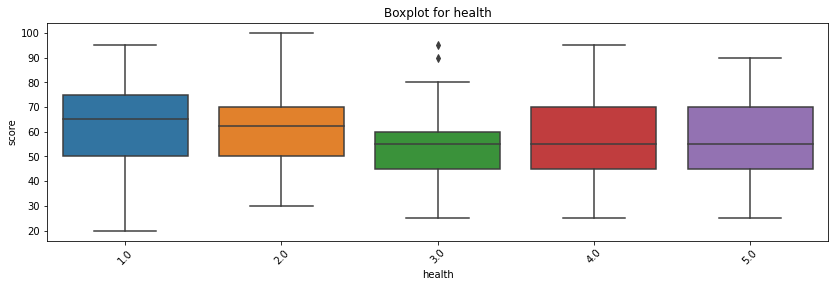

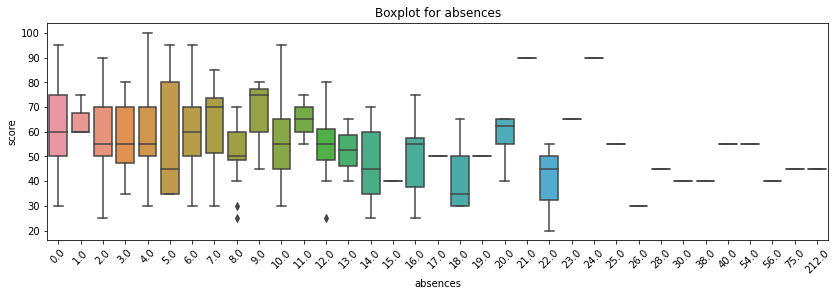

In [20]:
for col in int_columns:
    get_boxplot(col)

In [23]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [24]:
for col in int_columns:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки fedu
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки goout


In [29]:
for col in bool_columns:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки schoolsup


In [30]:
for col in str_columns:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob


# Выводы

В результате EDA для анализа влияния условий жизни студентов на результаты госэкзамена по математике были получены следующие выводы:
    - В столбце score присутсвуют нулевые заначения, это говорит о том что не все студенты из датасета сдавали экзамен, для анализа использовались только положительные результаты тестов.
    - Выявлена статистическая зависимость успеваемости от образования родителей, временем на дополнительные занятия и отдыхом.
    - Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это medu, fedu, studytime, studytime, failures, goout, address, mjob, schoolsup